# Exercises - GEO4902-01 - General modeling concepts

Kjersti Stangeland, Fall 2024

# Exercise 01A - How to access the latest weather forecast:

In [20]:
# import python packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cy
from matplotlib.dates import DateFormatter
import netCDF4

##### Specify the file on the thredds server. For example the full file of latest forecast of the AROME Arctic weather model. Note, at this point only metadata is retrieved

In [2]:
url = 'https://thredds.met.no/thredds/dodsC/aromearcticlatest/latest/arome_arctic_lagged_12_h_latest_2_5km_latest.nc'
dataset = xr.open_dataset(url, engine='netcdf4')

### Metadata

In [3]:
dataset

<xarray.Dataset> Size: 10GB
Dimensions:                    (time: 58, ensemble_member: 4, pressure: 2,
                                height_above_msl: 1, height0: 1, height1: 1,
                                height2: 1, x: 739, y: 949)
Coordinates:
  * time                       (time) datetime64[ns] 464B 2024-09-12T12:00:00...
  * ensemble_member            (ensemble_member) int16 8B 0 1 2 3
  * pressure                   (pressure) float32 8B 850.0 925.0
  * height_above_msl           (height_above_msl) float32 4B 0.0
  * height0                    (height0) float32 4B 2.0
  * height1                    (height1) float32 4B 0.0
  * height2                    (height2) float32 4B 10.0
  * x                          (x) float32 3kB 2.786e+05 2.811e+05 ... 2.124e+06
  * y                          (y) float32 4kB -8.98e+05 ... 1.472e+06
    longitude                  (y, x) float64 6MB ...
    latitude                   (y, x) float64 6MB ...
Data variables: (12/15)
    forecast_reference_time    datetime64[ns] 8B ...
    projection_lambert         int32 4B ...
    x_wind_pl                  (time, pressure, ensemble_member, y, x) float32 1GB ...
    y_wind_pl                  (time, pressure, ensemble_member, y, x) float32 1GB ...
    air_temperature_pl         (time, pressure, ensemble_member, y, x) float32 1GB ...
    air_temperature_2m         (time, height0, ensemble_member, y, x) float32 651MB ...
    ...                         ...
    cloud_area_fraction        (time, height1, ensemble_member, y, x) float32 651MB ...
    air_pressure_at_sea_level  (time, height_above_msl, ensemble_member, y, x) float32 651MB ...
    precipitation_amount_acc   (time, height1, ensemble_member, y, x) float32 651MB ...
    snowfall_amount_acc        (time, height1, ensemble_member, y, x) float32 651MB ...
    wind_speed_of_gust         (time, height2, ensemble_member, y, x) float32 651MB ...
    fog_area_fraction          (time, height1, ensemble_member, y, x) float32 651MB ...
Attributes: (12/23)
    Conventions:                     CF-1.6, ACDD
    institution:                     Norwegian Meteorological Institute, MET ...
    institution_short_name:          NO/MET
    creator_url:                     met.no
    source:                          AROME-Arctic 2.5km
    title:                           AROME_Arctic 2.5km
    ...                              ...
    dataset_production_status:       Active
    iso_topic_category:              climatologyMeteorologyAtmosphere
    spatial_representation:          grid
    naming_authority:                no.met
    history:                         2024-09-12T14:24:21 creation by fimex
    DODS_EXTRA.Unlimited_Dimension:  time

__What is metadata and why is it important?__

Metadata is often attached to datasets and provide information about the outputs, which in our case is from a model. From metadata you get an overview of the contents, with descriptions of the grid, time steps, data variables available, dimensions of the model output and so on. Metadata is then data about the data. It is important because it helps us interpret the data and obtain useful information about how for instance the data variables are related to the grid-points of the model, or how large the model domain is. It simplifies reading the data, as it is labeled and organized. In addition to that you can read in the metadata who has provided the output, name of model, licenses an conventions used for names. Such things important for reproducible science and integrity. :)

### Find a specific point and plot the forecast. 
###### Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [4]:
# Function to find a specific lat/lon location 

def findindex(alat,alon,plat,plon):
    # finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    # print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [5]:
# Find a specific location, for example for Barentsburg

lon = 14.2110; lat= 78.0650
[xloc,yloc] = findindex(dataset.latitude, dataset.longitude, lat, lon) 

t2m_point = dataset.air_temperature_2m[:,0,1,xloc,yloc]

print('longitude =', float(dataset.longitude[xloc,yloc].values.round(2)))
print('latitude =', float(dataset.latitude[xloc,yloc].values.round(2)))

# Note the number of dimentsions of the temperature array and cross-check with the metadata

longitude = 14.18
latitude = 78.06


/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_66441/3006826606.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x=int(x)
/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_66441/3006826606.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)


In [6]:
dataset.time

<xarray.DataArray 'time' (time: 58)> Size: 464B
array(['2024-09-12T12:00:00.000000000', '2024-09-12T13:00:00.000000000',
       '2024-09-12T14:00:00.000000000', '2024-09-12T15:00:00.000000000',
       '2024-09-12T16:00:00.000000000', '2024-09-12T17:00:00.000000000',
       '2024-09-12T18:00:00.000000000', '2024-09-12T19:00:00.000000000',
       '2024-09-12T20:00:00.000000000', '2024-09-12T21:00:00.000000000',
       '2024-09-12T22:00:00.000000000', '2024-09-12T23:00:00.000000000',
       '2024-09-13T00:00:00.000000000', '2024-09-13T01:00:00.000000000',
       '2024-09-13T02:00:00.000000000', '2024-09-13T03:00:00.000000000',
       '2024-09-13T04:00:00.000000000', '2024-09-13T05:00:00.000000000',
       '2024-09-13T06:00:00.000000000', '2024-09-13T07:00:00.000000000',
       '2024-09-13T08:00:00.000000000', '2024-09-13T09:00:00.000000000',
       '2024-09-13T10:00:00.000000000', '2024-09-13T11:00:00.000000000',
       '2024-09-13T12:00:00.000000000', '2024-09-13T13:00:00.000000000',
       '2024-09-13T14:00:00.000000000', '2024-09-13T15:00:00.000000000',
       '2024-09-13T16:00:00.000000000', '2024-09-13T17:00:00.000000000',
       '2024-09-13T18:00:00.000000000', '2024-09-13T19:00:00.000000000',
       '2024-09-13T20:00:00.000000000', '2024-09-13T21:00:00.000000000',
       '2024-09-13T22:00:00.000000000', '2024-09-13T23:00:00.000000000',
       '2024-09-14T00:00:00.000000000', '2024-09-14T01:00:00.000000000',
       '2024-09-14T02:00:00.000000000', '2024-09-14T03:00:00.000000000',
       '2024-09-14T04:00:00.000000000', '2024-09-14T05:00:00.000000000',
       '2024-09-14T06:00:00.000000000', '2024-09-14T07:00:00.000000000',
       '2024-09-14T08:00:00.000000000', '2024-09-14T09:00:00.000000000',
       '2024-09-14T10:00:00.000000000', '2024-09-14T11:00:00.000000000',
       '2024-09-14T12:00:00.000000000', '2024-09-14T13:00:00.000000000',
       '2024-09-14T14:00:00.000000000', '2024-09-14T15:00:00.000000000',
       '2024-09-14T16:00:00.000000000', '2024-09-14T17:00:00.000000000',
       '2024-09-14T18:00:00.000000000', '2024-09-14T19:00:00.000000000',
       '2024-09-14T20:00:00.000000000', '2024-09-14T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 464B 2024-09-12T12:00:00 ... 2024-09-14T21...
Attributes:
    long_name:      time
    standard_name:  time
    _ChunkSizes:    512

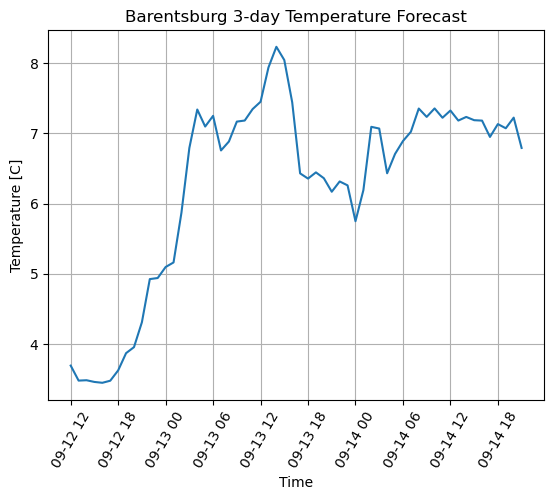

In [7]:
plt.plot(dataset.time, t2m_point - 273.15, '-')

plt.title("Barentsburg 3-day Temperature Forecast")
plt.ylabel('Temperature [C]')
plt.xticks(rotation=60)
plt.xlabel('Time')
plt.grid()
plt.show()

### Plot one forecast on a map

#### Choose ensemble member and timestep 

In [8]:
dataset.air_temperature_2m

<xarray.DataArray 'air_temperature_2m' (time: 58, height0: 1,
                                        ensemble_member: 4, y: 949, x: 739)> Size: 651MB
[162704152 values with dtype=float32]
Coordinates:
  * time             (time) datetime64[ns] 464B 2024-09-12T12:00:00 ... 2024-...
  * ensemble_member  (ensemble_member) int16 8B 0 1 2 3
  * height0          (height0) float32 4B 2.0
  * x                (x) float32 3kB 2.786e+05 2.811e+05 ... 2.121e+06 2.124e+06
  * y                (y) float32 4kB -8.98e+05 -8.955e+05 ... 1.47e+06 1.472e+06
    longitude        (y, x) float64 6MB -17.96 -17.89 -17.83 ... 68.83 68.83
    latitude         (y, x) float64 6MB 69.3 69.3 69.29 ... 71.15 71.13 71.11
Attributes:
    long_name:      Screen level temperature (T2M)
    standard_name:  air_temperature
    units:          K
    grid_mapping:   projection_lambert
    _ChunkSizes:    [  1   1   2 475 370]

In [9]:
ensemble_mem = 1
timestep = 8

t2m_area = dataset.air_temperature_2m[timestep, 0, ensemble_mem, :, :]

In [10]:
t2m_area

<xarray.DataArray 'air_temperature_2m' (y: 949, x: 739)> Size: 3MB
[701311 values with dtype=float32]
Coordinates:
    time             datetime64[ns] 8B 2024-09-12T20:00:00
    ensemble_member  int16 2B 1
    height0          float32 4B 2.0
  * x                (x) float32 3kB 2.786e+05 2.811e+05 ... 2.121e+06 2.124e+06
  * y                (y) float32 4kB -8.98e+05 -8.955e+05 ... 1.47e+06 1.472e+06
    longitude        (y, x) float64 6MB -17.96 -17.89 -17.83 ... 68.83 68.83
    latitude         (y, x) float64 6MB 69.3 69.3 69.29 ... 71.15 71.13 71.11
Attributes:
    long_name:      Screen level temperature (T2M)
    standard_name:  air_temperature
    units:          K
    grid_mapping:   projection_lambert
    _ChunkSizes:    [  1   1   2 475 370]

Text(0.5, 0.98, 'Temperature forecast of Barentsburg at 2024-09-12T20:00:00.000000000')

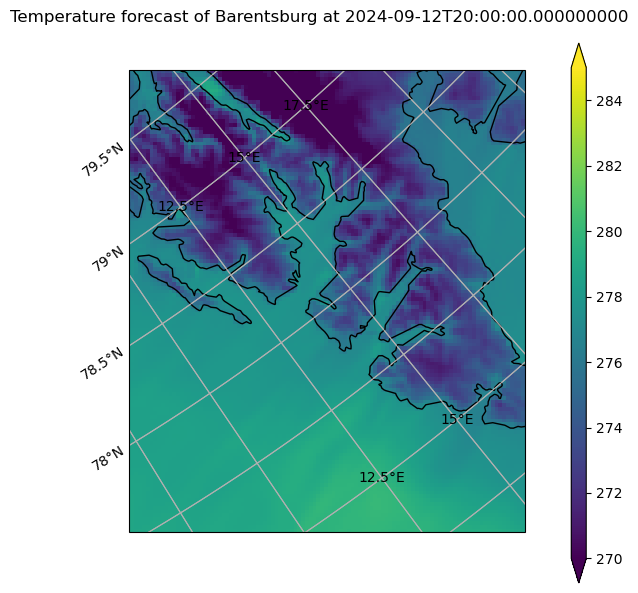

In [21]:
projection = cy.crs.LambertConformal(central_longitude = dataset.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  = dataset.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = dataset.projection_lambert.standard_parallel)
fig = plt.figure(figsize=[6, 6])

ax = plt.subplot(1, 1, 1, projection=projection)
ax.set_extent([lon - 1.5, lon + 1.5, lat-1.5, lat+1.5], ccrs.crs.PlateCarree())

ax.gridlines()
ax.add_feature(cy.feature.COASTLINE, zorder=2) 
cf = ax.pcolormesh(t2m_area.longitude, t2m_area.latitude, t2m_area[:,:], transform=cy.crs.PlateCarree(), zorder=1)
cf.set_clim(270, 285)
gl = ax.gridlines(draw_labels=True)
gl.top_labels   = False
gl.right_labels = False
   
cbaxes = fig.add_axes([0.92, 0.025, 0.025, 0.9])
cbar = plt.colorbar(cf, cax=cbaxes, shrink=0.5, orientation='vertical', extend='both')

fig.suptitle(f'Temperature forecast of Barentsburg at {t2m_area.time.values}')

* Describe how the weather system will change (e.g. surface pressure or Geopotential height) and the implications for wind, temperature, and precipitation for the coming days, Compare it with yr.no. 

In [26]:
dataset.air_pressure_at_sea_level

<xarray.DataArray 'air_pressure_at_sea_level' (time: 58, height_above_msl: 1,
                                               ensemble_member: 4, y: 949,
                                               x: 739)> Size: 651MB
[162704152 values with dtype=float32]
Coordinates:
  * time              (time) datetime64[ns] 464B 2024-09-12T12:00:00 ... 2024...
  * ensemble_member   (ensemble_member) int16 8B 0 1 2 3
  * height_above_msl  (height_above_msl) float32 4B 0.0
  * x                 (x) float32 3kB 2.786e+05 2.811e+05 ... 2.124e+06
  * y                 (y) float32 4kB -8.98e+05 -8.955e+05 ... 1.472e+06
    longitude         (y, x) float64 6MB -17.96 -17.89 -17.83 ... 68.83 68.83
    latitude          (y, x) float64 6MB 69.3 69.3 69.29 ... 71.15 71.13 71.11
Attributes:
    long_name:      Mean Sea Level Pressure (MSLP)
    standard_name:  air_pressure_at_sea_level
    units:          Pa
    grid_mapping:   projection_lambert
    _ChunkSizes:    [  1   1   2 475 370]

In [27]:
plt.plot(dataset.time.values, dataset.air_pressure_at_sea_level.values[:,:, 0, lat, lon])

* Plot the temperature and wind forecast from AROMEArctic as a map for 2020 February 04 14:00 UTC. And a point-forecast initialized on 2020 February 04 00:00 UTC  for Tromsø. The forecast date is related to a polar low which made landfall in 2020 directly at Tromsø. 

In [ ]:
...